In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Cleaning and Preparation

In [2]:
df = pd.read_csv("zomato_restaurants_in_India.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [3]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [5]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [6]:
df.shape

(211944, 26)

In [7]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['address', 'zipcode', 'cuisines', 'timings', 'opentable_support']

<Axes: >

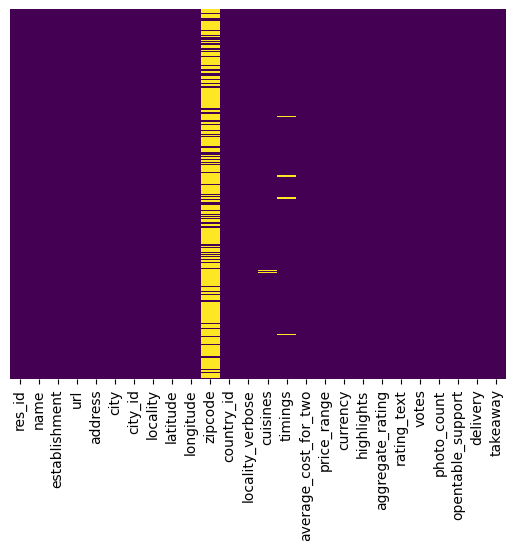

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [10]:
df.zipcode.value_counts()

zipcode
0             7100
0.0           2757
482001         918
313001         750
305001         578
              ... 
700028           1
Kolkata-20       1
27               1
700124           1
390004.0         1
Name: count, Length: 1311, dtype: int64

In [11]:
zc = df.zipcode.value_counts().index
print(zc)

Index(['0', '0.0', '482001', '313001', '305001', '226010', '248001.0',
       '605001.0', '603203', '482002',
       ...
       '560090', '5600038', '560059', '324001.0', '560 102', '700028',
       'Kolkata-20', '27', '700124', '390004.0'],
      dtype='object', name='zipcode', length=1311)


In [12]:
zv = df.zipcode.value_counts().values
print(zv)

[7100 2757  918 ...    1    1    1]


In [13]:
df.zipcode.head()

0         NaN
1    282001.0
2    282010.0
3    282002.0
4         NaN
Name: zipcode, dtype: object

In [14]:
df = df.fillna(0)

In [15]:
df.zipcode.head()

0           0
1    282001.0
2    282010.0
3    282002.0
4           0
Name: zipcode, dtype: object

In [16]:
df.zipcode.value_counts()

zipcode
0             163187
0               7100
0.0             2757
482001           918
313001           750
               ...  
700028             1
Kolkata-20         1
27                 1
700124             1
390004.0           1
Name: count, Length: 1312, dtype: int64

<Axes: >

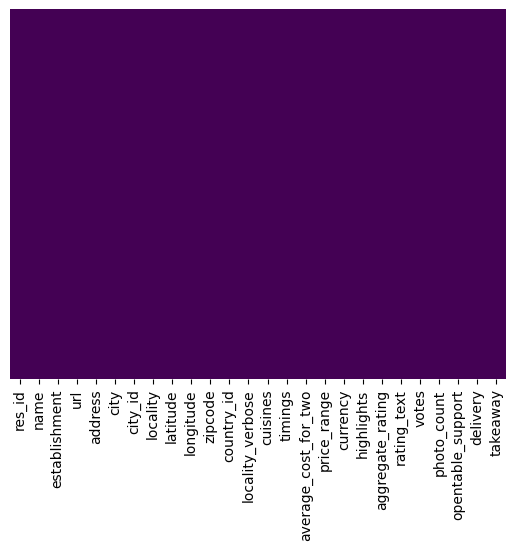

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [18]:
dfE = pd.get_dummies(df, columns=['zipcode'])
print(dfE)

          res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomat

In [19]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [20]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

Exploratory Data Analysis:

In [ ]:
df.describe()

In [ ]:
df['price_range'].describe()

In [ ]:
df['price_range'].var()

In [ ]:
df['price_range'].std()

In [ ]:
#Distribution of Ratings

sns.histplot(df['aggregate_rating'], kde=True)
plt.title('Rating Distrution', color='blue')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Bar Chart for price range

price_counts = df['price_range'].value_counts().sort_index()
sns.barplot(x=price_counts.index, y=price_counts.values)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurents')
plt.show()


In [ ]:
# #Cuisine Distribution

# top_cuisines = df['cuisines'].value_counts().head(20).index
# sns.countplot(data=df, x='cuisines')
# plt.title('Cuisine Popularity')
# plt.xlabel('Cuisines')
# plt.ylabel('Number of Restaurants')
# plt.show()

In [ ]:
#Distribution of Cuisines by Region

plt.figure(figsize=(12, 6))
sns.countplot(df['cuisines'])
plt.title('Distribution of Cuisines by Region')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Average Ratings by Region

plt.figure(figsize=(10, 5))
sns.barplot(df['region'].mean)
plt.title('Average Ratings by Region')
plt.show()


In [ ]:
#Price Range Comparison

plt.figure(figsize=(10, 5))
sns.countplot(df['price_range'])
plt.title('Comparison of Price Ranges Across Regions')
plt.show()


In [ ]:
df.columns

In [ ]:
#Dining Format Preferences

sns.countplot(df['timings'])
plt.title('Dining Format Preferences Across Regions')
plt.show()


In [ ]:
#Analyze Cuisines Popularity by Region

plt.figure(figsize=(12, 6))
sns.countplot(df['cuisine'])
plt.title('Popularity of Cuisines in Different Regions')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


In [ ]:
#Examine Relationships Using Scatter Plots and Correlation Analysis

plt.figure(figsize=(10, 5))
sns.scatterplot(x='ratings', y='number_of_reviews', hue='price_range')
plt.title('Relationship Between Ratings and Popularity Across Price Ranges')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews (Popularity)')
plt.legend(title='Price Range')
plt.show()


In [ ]:
#Identify Major Competitors by Region

top_competitors = df.groupby('city').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(df=top_competitors, x='name', y='aggregate_rating', hue='region')
plt.title('Top Competitors by Region Based on Ratings')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


In [ ]:
#Analyze Cuisine and Price Range Distribution

cuisine_distribution = df.groupby(['city', 'cuisines']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cuisine Distribution by Region')
plt.ylabel('Region')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
plt.show()
